In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fuelConsumption = pd.read_csv('FuelConsumption.csv')

### Q1: Select the features 'ENGINESIZE. 'CYLINDERS'. 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size.

In [3]:
df = fuelConsumption[['ENGINESIZE',
'CYLINDERS',
'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [4]:
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


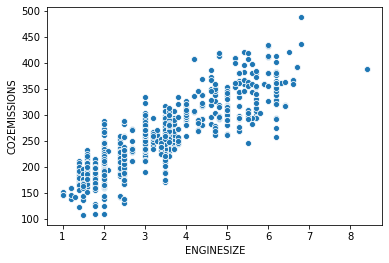

In [5]:
sns.scatterplot(x = 'ENGINESIZE',
            y = 'CO2EMISSIONS',
            data = df)

### Q2: Split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

X = df[['ENGINESIZE',
'CYLINDERS',
'FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

model.fit(x_train,y_train)

pred_test = model.predict(x_test)

In [7]:
from sklearn import metrics
r2_test = metrics.r2_score(y_test,pred_test)
print(f"R2 score for testing examples is: {r2_test}")

R2 score for testing examples is: 0.8605707371421957


### Q3: Try to use a polynomial regression with the dataset of degree 2, 3, 4, 5 and verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2. score.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X1_train, X1_test, y1_train, y1_test = train_test_split(poly_features, y, test_size=0.3, random_state=100)

In [9]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X1_train, y1_train)

LinearRegression()

### Degree 2

In [10]:
poly_reg_y_predicted = poly_reg_model.predict(X1_test)
from sklearn import metrics
r2_test = metrics.r2_score(y1_test, poly_reg_y_predicted)
print('Mean absoloute error ', mean_absolute_error(y1_test, poly_reg_y_predicted))
print('R2 value: ', r2_test)
print('Residual sum of squares is : '+ str(np.sum(np.square(poly_reg_y_predicted - y1_test))))

Mean absoloute error  10.902592826829748
R2 value:  0.8935388230191204
Residual sum of squares is : 126042.34711471453


### Degree 3

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X1_train, X1_test, y1_train, y1_test = train_test_split(poly_features, y, test_size=0.3, random_state=100)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X1_train, y1_train)
poly_reg_y_predicted = poly_reg_model.predict(X1_test)
from sklearn import metrics
r2_test = metrics.r2_score(y1_test, poly_reg_y_predicted)
print('Mean absoloute error ', mean_absolute_error(y1_test, poly_reg_y_predicted))
print('R2 value: ', r2_test)
print('Residual sum of squares is : '+ str(np.sum(np.square(poly_reg_y_predicted - y1_test))))

Mean absoloute error  11.093146946584316
R2 value:  0.9138886477483165
Residual sum of squares is : 101949.62388001267


### Degree 4

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X)
X1_train, X1_test, y1_train, y1_test = train_test_split(poly_features, y, test_size=0.3, random_state=100)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X1_train, y1_train)
poly_reg_y_predicted = poly_reg_model.predict(X1_test)
from sklearn import metrics
r2_test = metrics.r2_score(y1_test, poly_reg_y_predicted)
print('Mean absoloute error ', mean_absolute_error(y1_test, poly_reg_y_predicted))
print('R2 value: ', r2_test)
print('Residual sum of squares is : '+ str(np.sum(np.square(poly_reg_y_predicted - y1_test))))

Mean absoloute error  9.089808952609827
R2 value:  0.9248228987832893
Residual sum of squares is : 89004.26010071699


### Degree 5

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(X)
X1_train, X1_test, y1_train, y1_test = train_test_split(poly_features, y, test_size=0.3, random_state=100)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X1_train, y1_train)
poly_reg_y_predicted = poly_reg_model.predict(X1_test)
from sklearn import metrics
r2_test = metrics.r2_score(y1_test, poly_reg_y_predicted)
print('Mean absoloute error ', mean_absolute_error(y1_test, poly_reg_y_predicted))
print('R2 value: ', r2_test)
print('Residual sum of squares is : '+ str(np.sum(np.square(poly_reg_y_predicted - y1_test))))

Mean absoloute error  9.494532071117451
R2 value:  0.8634308518726282
Residual sum of squares is : 161688.0111754032


Degree 4 has the best result out of all the degrees that we have chosen
It has the largest R2 value, and smallest mean absoloute error and residual sum of squares. 
Also, it is significantly better than a simple linear regression model. 

Degree 5 overfits the data hence has such a poor performance